In [1]:
import os
os.chdir('../..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import random

import scipy.stats as st
from os import listdir
from os.path import isfile, join

import seaborn as sns
sns.set_style("whitegrid")

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Variables

In [3]:
dataset = 'LPMC'

In [4]:
synth_dir = '../synth_data/' + dataset

files = ['../data/' + dataset + '/data.csv']
labels = ['original', 'TGAN', 'CTGAN', 'WGGP_WI_OD', 'WGAN_WI_NO']

for l in labels[1:]:
    files.append('../synth_data/' + dataset + '/' + l + '.csv')

In [5]:
files

['../data/LPMC/data.csv',
 '../synth_data/LPMC/TGAN.csv',
 '../synth_data/LPMC/CTGAN.csv',
 '../synth_data/LPMC/WGGP_WI_OD.csv',
 '../synth_data/LPMC/WGAN_WI_NO.csv']

In [6]:
colors = ['black', 'darkgray', 'lightgray', 'tab:blue', 'orange']

In [7]:
dfs = [pd.read_csv(file) for file in files]

In [8]:
dfs[0].dtypes

travel_mode                 object
purpose                     object
fueltype                    object
faretype                    object
bus_scale                  float64
survey_year                  int64
travel_year                  int64
travel_month                 int64
travel_date                  int64
day_of_week                  int64
start_time_linear          float64
age                          int64
female                       int64
driving_license              int64
car_ownership                int64
distance                     int64
dur_walking                float64
dur_cycling                float64
dur_pt_access              float64
dur_pt_rail                float64
dur_pt_bus                 float64
dur_pt_int                 float64
pt_n_interchanges            int64
dur_driving                float64
cost_transit               float64
cost_driving_fuel          float64
cost_driving_con_charge    float64
driving_traffic_percent    float64
dtype: object

# Test the distributions

In [9]:
dfs[0].columns

Index(['travel_mode', 'purpose', 'fueltype', 'faretype', 'bus_scale',
       'survey_year', 'travel_year', 'travel_month', 'travel_date',
       'day_of_week', 'start_time_linear', 'age', 'female', 'driving_license',
       'car_ownership', 'distance', 'dur_walking', 'dur_cycling',
       'dur_pt_access', 'dur_pt_rail', 'dur_pt_bus', 'dur_pt_int',
       'pt_n_interchanges', 'dur_driving', 'cost_transit', 'cost_driving_fuel',
       'cost_driving_con_charge', 'driving_traffic_percent'],
      dtype='object')

In [10]:
cont_cols = [10, 11, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27]

In [11]:
msk = []

for i in range(len(dfs[0].columns)):
    msk.append(i not in cont_cols)

In [12]:
dfs[0].columns[msk]

Index(['travel_mode', 'purpose', 'fueltype', 'faretype', 'bus_scale',
       'survey_year', 'travel_year', 'travel_month', 'travel_date',
       'day_of_week', 'female', 'driving_license', 'car_ownership',
       'pt_n_interchanges', 'cost_driving_con_charge'],
      dtype='object')

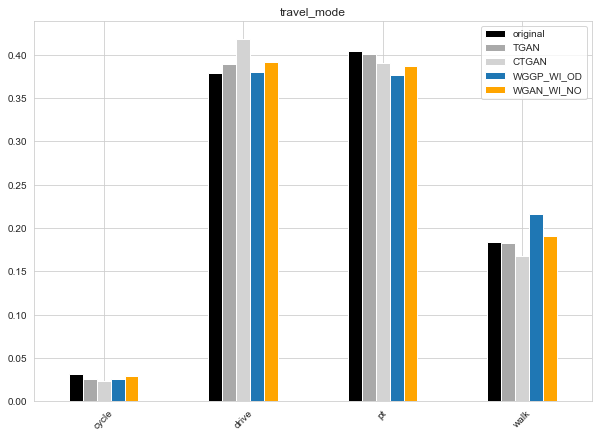

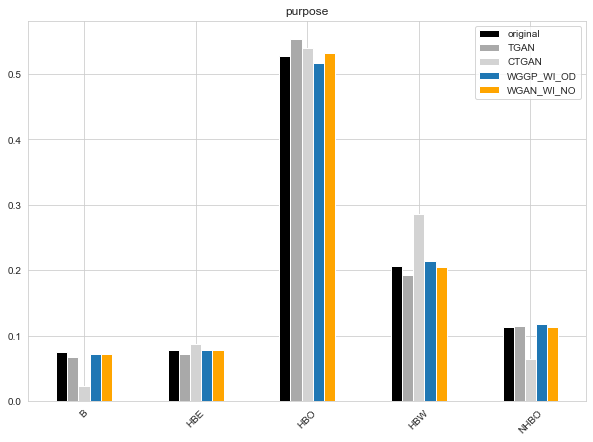

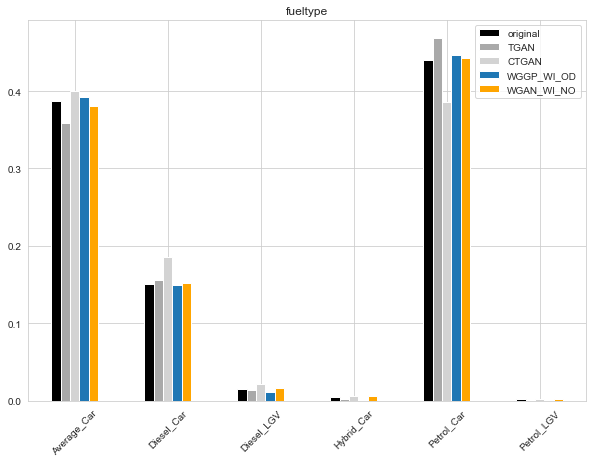

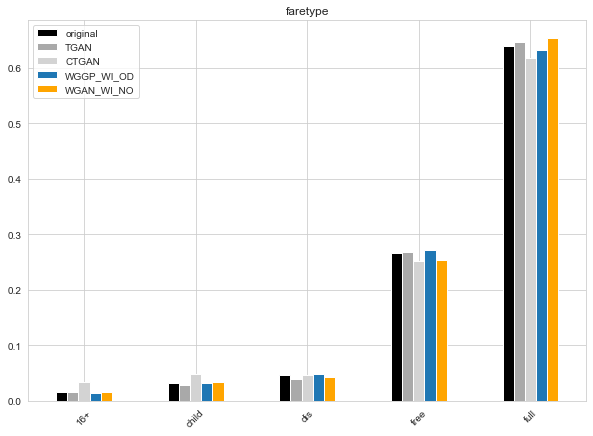

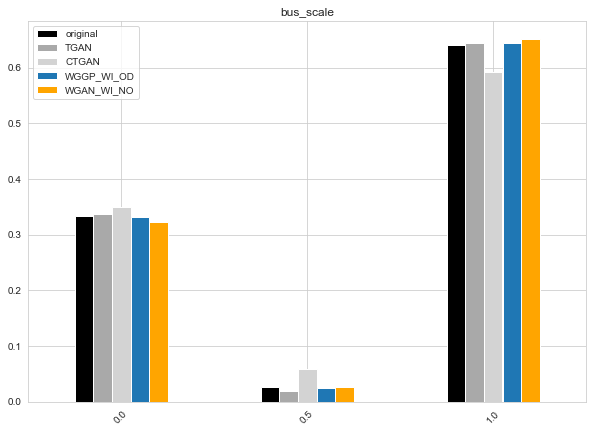

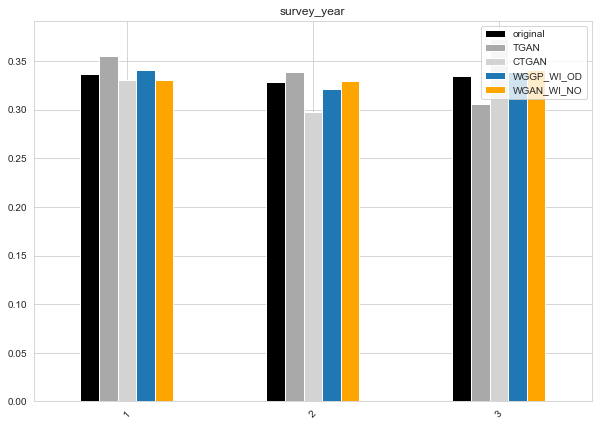

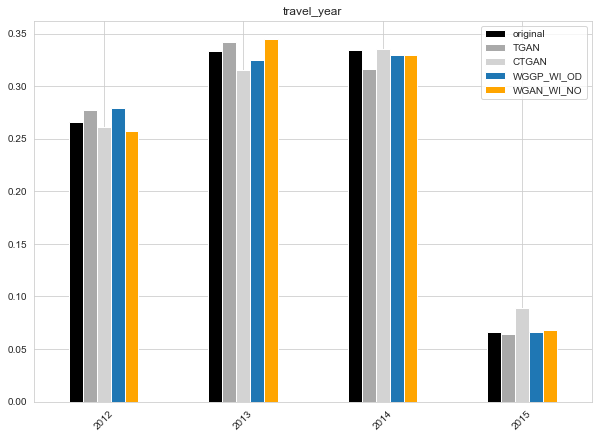

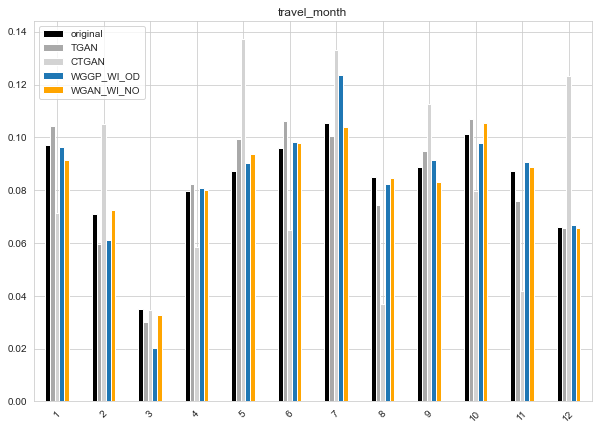

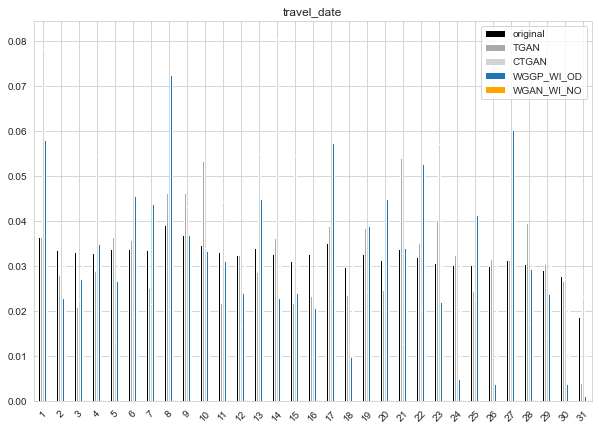

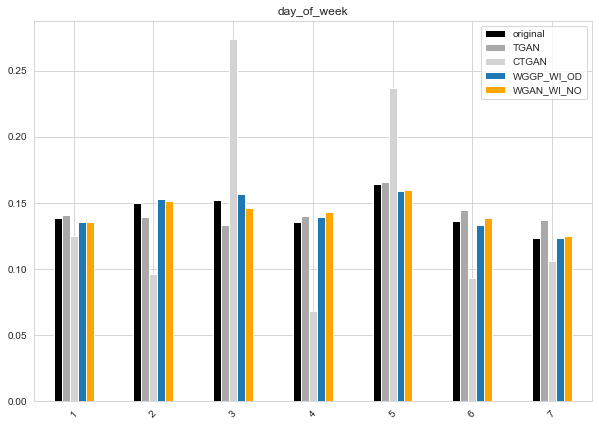

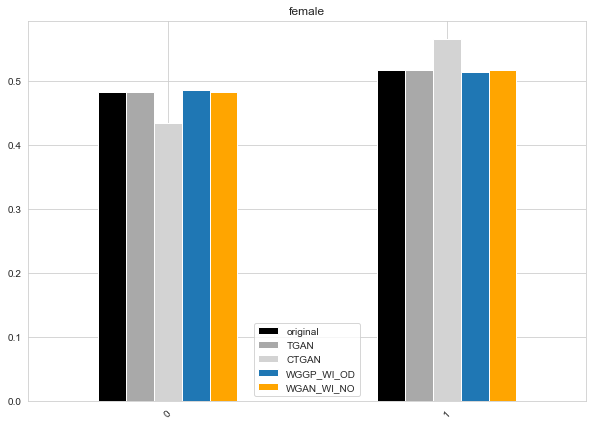

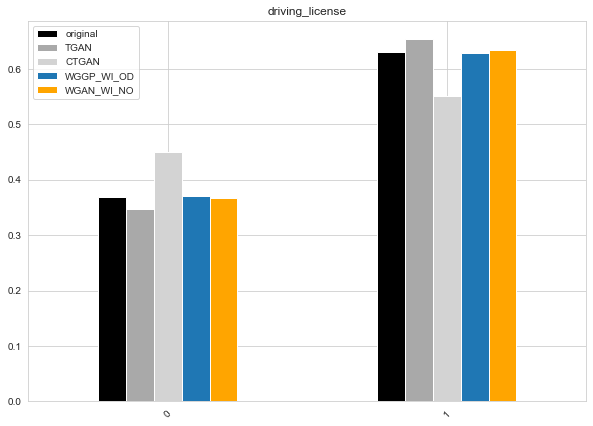

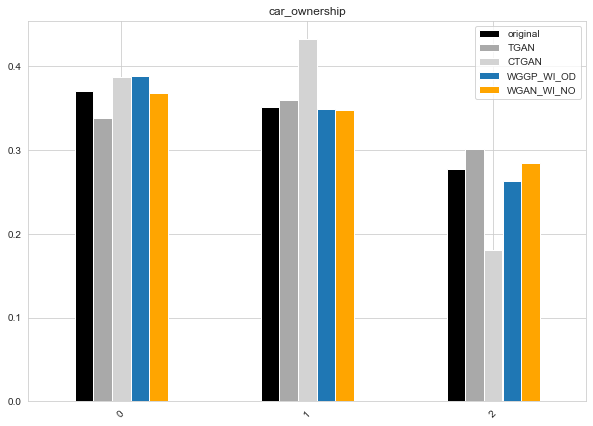

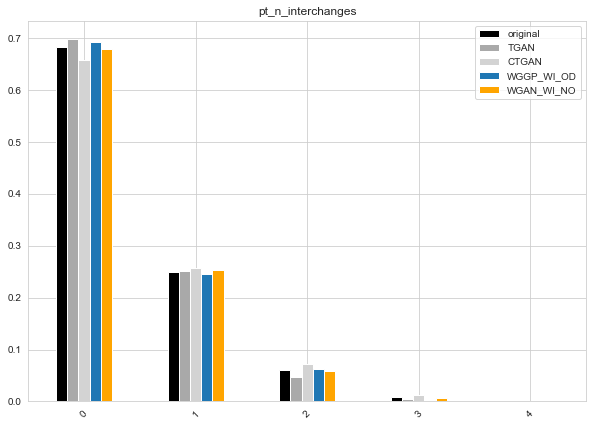

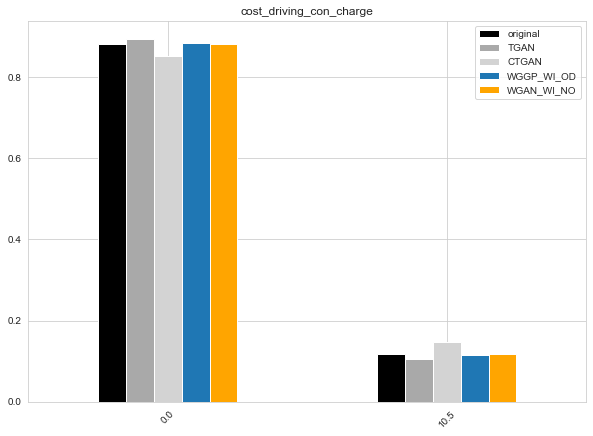

In [13]:
for col in dfs[0].columns[msk]:
    
    probs = [df[col].value_counts(normalize=True) for df in dfs]
    
    dct = {}
    for l in labels:
        dct[l] = []
    
    idx = np.sort(probs[0].index)
    
    for i in idx:       
        for j, l in enumerate(labels):
            try:
                val = probs[j].loc[i]
            except:
                val = 0
            dct[l].append(val)

        
    tmp_df = pd.DataFrame(dct, index=idx)
    
    tmp_df.plot(figsize=(10,7), kind='bar', color=colors[:len(labels)])

    plt.legend()
    plt.xticks(rotation=45)

    if col == 'work_status':
        x_names = []
        for i in work_status.keys():
            x_names.append(work_status[i])
                    
        plt.xticks(list(range(0,len(x_names))), x_names, rotation=0)

    plt.title(col)

    #plt.savefig('../figures/Chicago/distributions/' + col + '.pdf', bbox_inches='tight')
    #plt.savefig('../figures/Chicago/distributions/' + col + '.png', bbox_inches='tight')

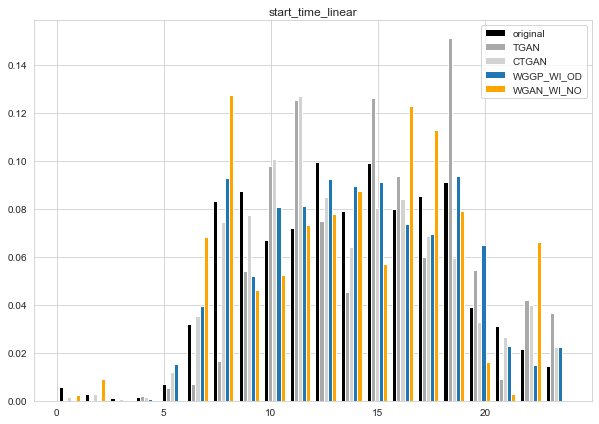

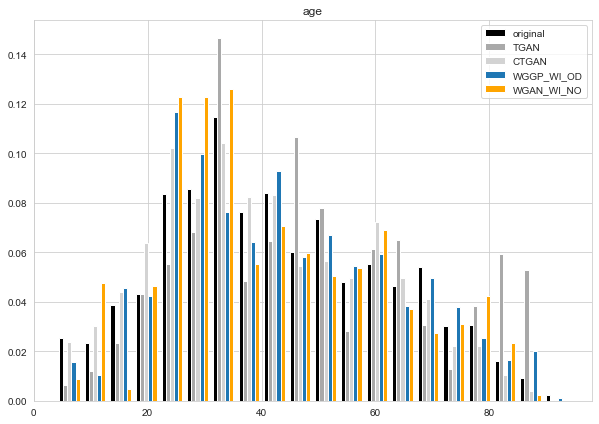

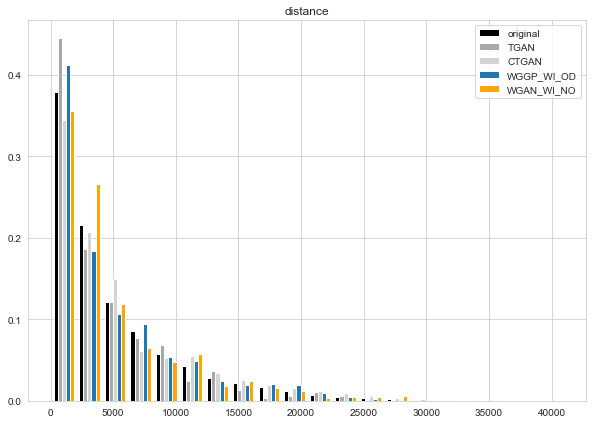

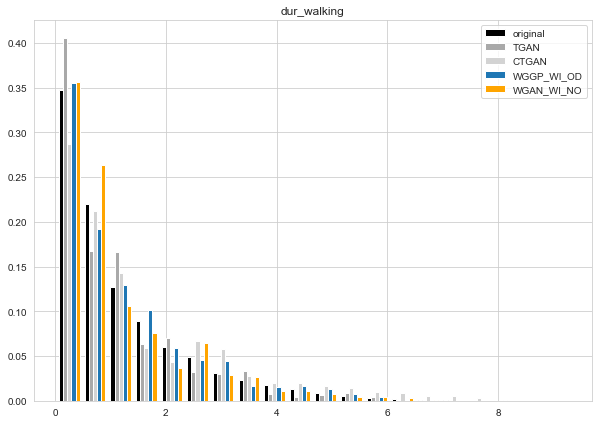

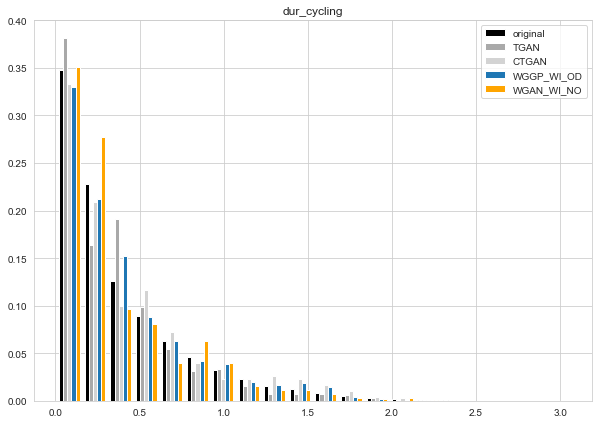

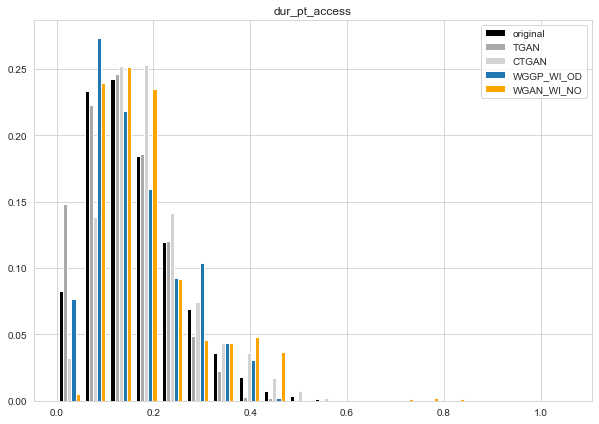

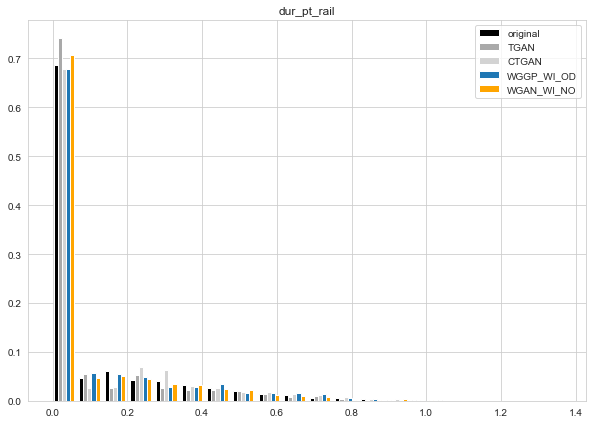

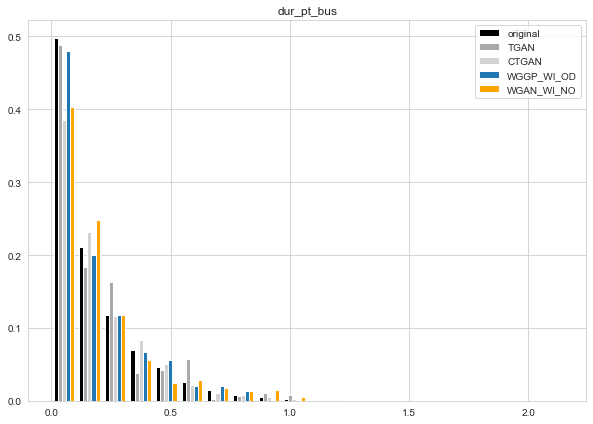

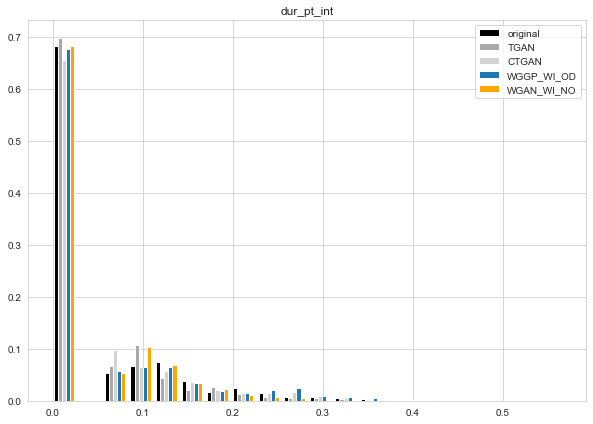

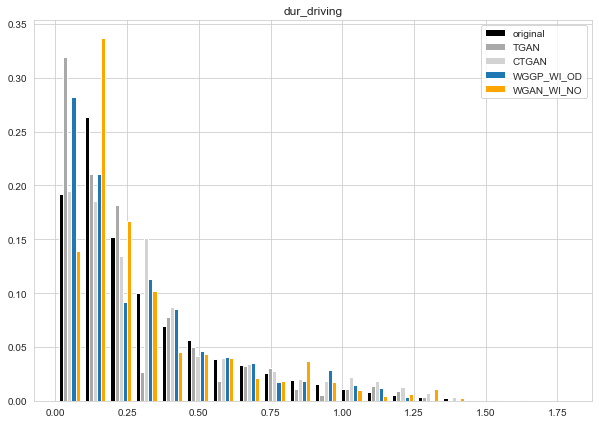

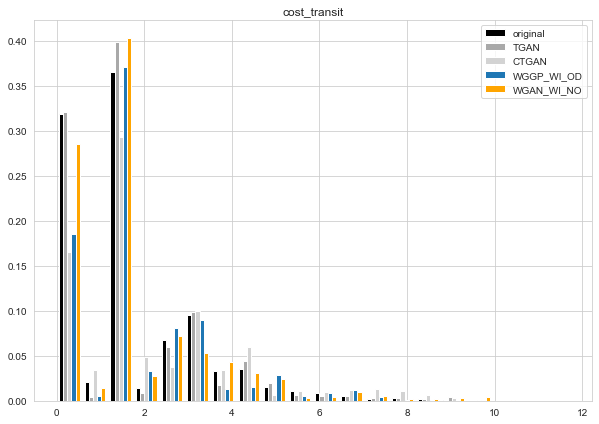

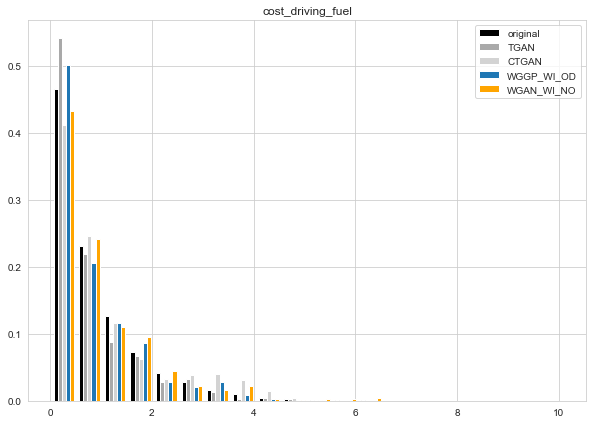

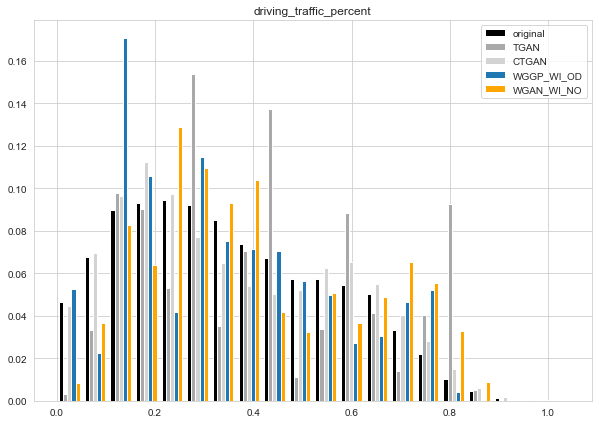

In [14]:
for col in dfs[0].columns[~np.array(msk)]:
    
    vals = [df[col] for df in dfs]
    weights = [np.ones_like(v)/len(v) for v in vals]
    
    plt.figure(figsize=(10,7))
    
    bins=np.histogram(np.hstack((vals[0],vals[1])), bins=20)[1] 
    
    plt.hist(vals,
             bins=bins, weights = weights,
             label=labels, color=colors[:len(labels)])
    
    plt.legend()
    plt.title(col)
    
    #plt.savefig('../figures/Chicago/distributions/' + col + '.pdf', bbox_inches='tight')
    #plt.savefig('../figures/Chicago/distributions/' + col + '.png', bbox_inches='tight')


# Sub distribution

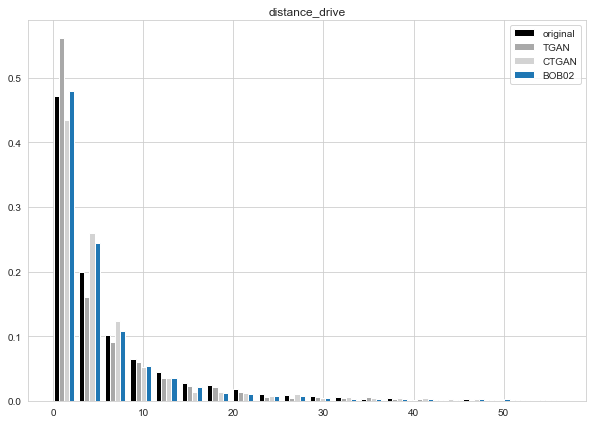

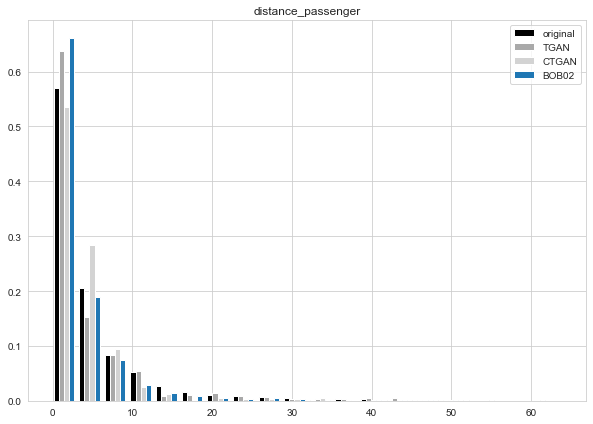

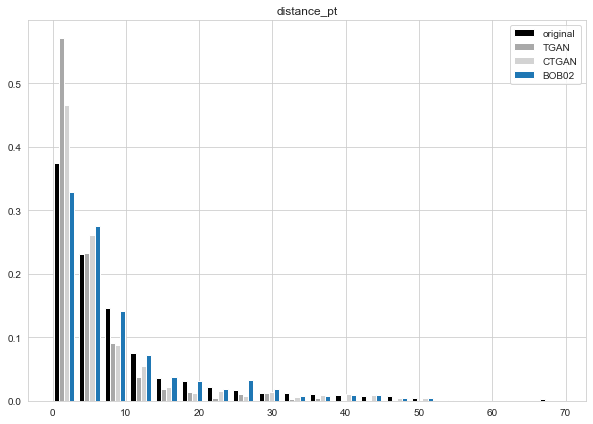

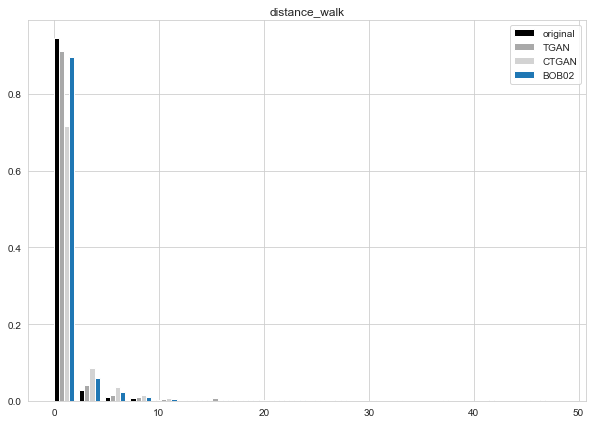

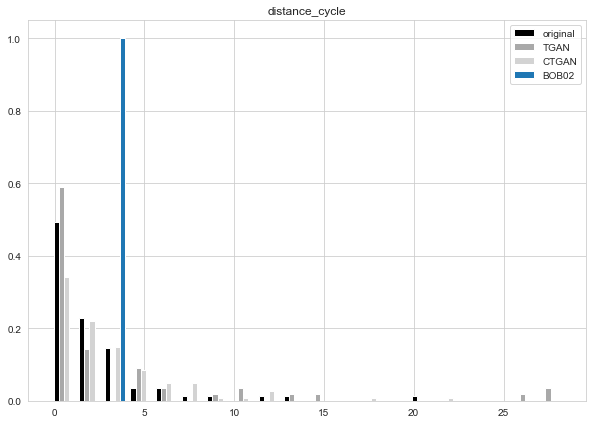

In [20]:
for i in dfs[0].choice.unique():
    
    vals = [df[df.choice == i].distance for df in dfs]
    weights = [np.ones_like(v)/len(v) for v in vals]

    plt.figure(figsize=(10,7))

    bins=np.histogram(np.hstack((vals[0],vals[1])), bins=20)[1] 
    
    plt.hist(vals,
             bins=bins, weights = weights,
             label=labels, color=colors[:len(labels)])
    
    plt.legend()
    
    plt.title('distance_' + i)
    
    #plt.savefig('../figures/tgan-chicago/sub/distance_' + choices[i] + '.pdf', bbox_inches='tight')
    #plt.savefig('../figures/tgan-chicago/sub/distance_' + choices[i] + '.png', bbox_inches='tight')


Text(0.5, 1.0, 'choice_young')

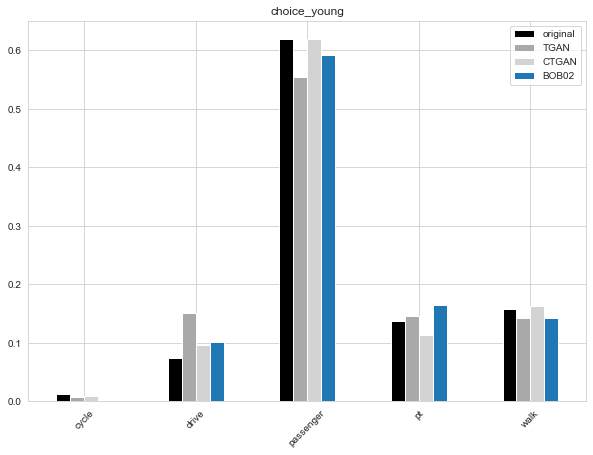

In [21]:
vals = [df[df.age <= 18].choice for df in dfs]

probs = [v.value_counts(normalize=True) for v in vals]

dct = {}
for l in labels:
    dct[l] = []

idx = np.sort(probs[0].index)

for i in idx:       
    for j, l in enumerate(labels):
        try:
            val = probs[j].loc[i]
        except:
            val = 0
        dct[l].append(val)


tmp_df = pd.DataFrame(dct, index=idx)

tmp_df.plot(figsize=(10,7), kind='bar', color=colors[:len(labels)])

plt.legend()
plt.xticks(rotation=45)

plt.title('choice_young')

#plt.savefig('../figures/tgan-chicago/sub/choice_young.pdf', bbox_inches='tight')
#plt.savefig('../figures/tgan-chicago/sub/choice_young.png', bbox_inches='tight')


Text(0.5, 1.0, 'choice_active')

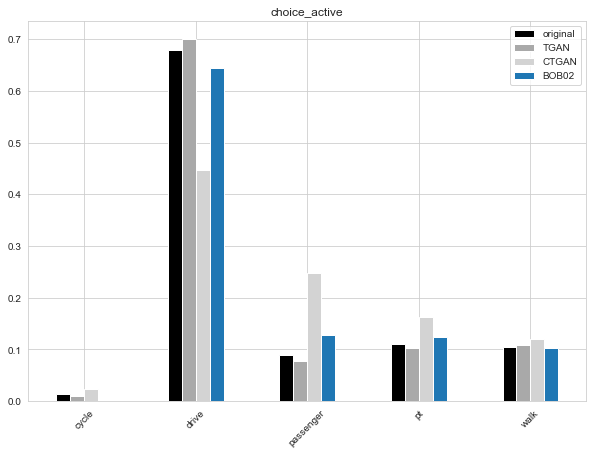

In [22]:
vals = [df[(df.age > 18) & (df.age <= 50)].choice for df in dfs]
probs = [v.value_counts(normalize=True) for v in vals]

dct = {}
for l in labels:
    dct[l] = []

idx = np.sort(probs[0].index)

for i in idx:       
    for j, l in enumerate(labels):
        try:
            val = probs[j].loc[i]
        except:
            val = 0
        dct[l].append(val)


tmp_df = pd.DataFrame(dct, index=idx)

tmp_df.plot(figsize=(10,7), kind='bar', color=colors[:len(labels)])

plt.legend()
plt.xticks(rotation=45)

plt.title('choice_active')

#plt.savefig('../figures/tgan-chicago/sub/choice_active.pdf', bbox_inches='tight')
#plt.savefig('../figures/tgan-chicago/sub/choice_active.png', bbox_inches='tight')


Text(0.5, 1.0, 'choice_old')

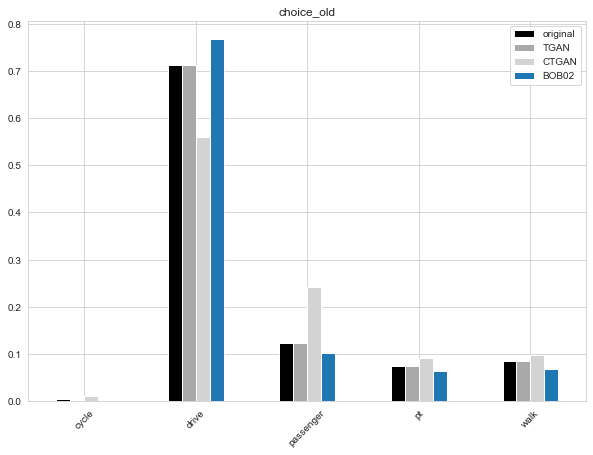

In [23]:
vals = [df[(df.age > 50)].choice for df in dfs]
probs = [v.value_counts(normalize=True) for v in vals]

dct = {}
for l in labels:
    dct[l] = []

idx = np.sort(probs[0].index)

for i in idx:       
    for j, l in enumerate(labels):
        try:
            val = probs[j].loc[i]
        except:
            val = 0
        dct[l].append(val)


tmp_df = pd.DataFrame(dct, index=idx)

tmp_df.plot(figsize=(10,7), kind='bar', color=colors[:len(labels)])

plt.legend()
plt.xticks(rotation=45)

plt.title('choice_old')

#plt.savefig('../figures/tgan-chicago/sub/choice_old.pdf', bbox_inches='tight')
#plt.savefig('../figures/tgan-chicago/sub/choice_old.png', bbox_inches='tight')


Text(0.5, 1.0, 'no_vehicles_choice')

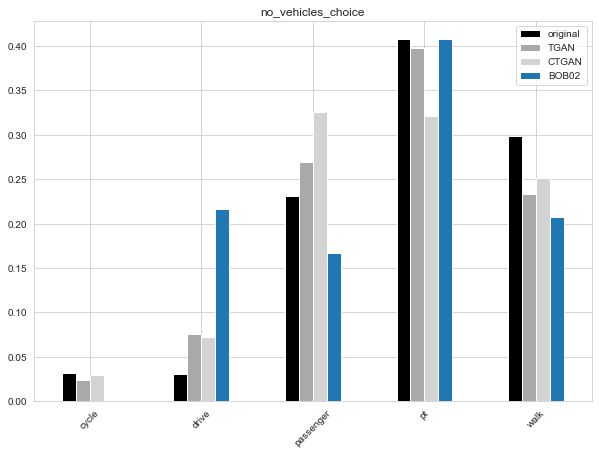

In [24]:
vals = [df[df.hh_vehicles == 0].choice for df in dfs]
probs = [v.value_counts(normalize=True) for v in vals]

dct = {}
for l in labels:
    dct[l] = []

idx = np.sort(probs[0].index)

for i in idx:       
    for j, l in enumerate(labels):
        try:
            val = probs[j].loc[i]
        except:
            val = 0
        dct[l].append(val)


tmp_df = pd.DataFrame(dct, index=idx)

tmp_df.plot(figsize=(10,7), kind='bar', color=colors[:len(labels)])

plt.legend()
plt.xticks(rotation=45)

plt.title('no_vehicles_choice')

#plt.savefig('../figures/tgan-chicago/sub/no_vehicles_choice.pdf', bbox_inches='tight')
#plt.savefig('../figures/tgan-chicago/sub/no_vehicles_choice.png', bbox_inches='tight')

Text(0.5, 1.0, 'vehicles_low_income')

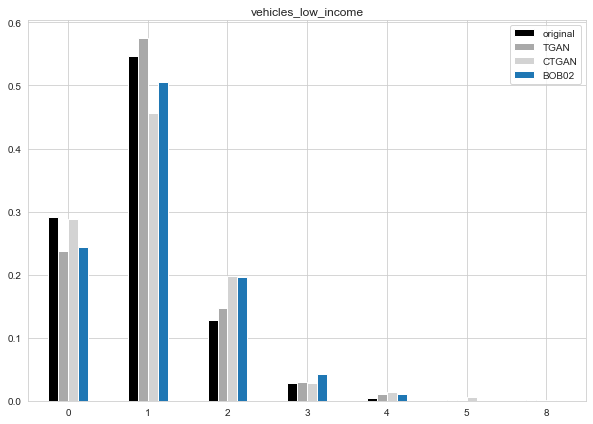

In [25]:
vals = [df[df.hh_income <= 2].hh_vehicles for df in dfs]
probs = [v.value_counts(normalize=True) for v in vals]

dct = {}
for l in labels:
    dct[l] = []

idx = np.sort(probs[0].index)

for i in idx:       
    for j, l in enumerate(labels):
        try:
            val = probs[j].loc[i]
        except:
            val = 0
        dct[l].append(val)


tmp_df = pd.DataFrame(dct, index=idx)

tmp_df.plot(figsize=(10,7), kind='bar', color=colors[:len(labels)])

plt.legend()
plt.xticks(rotation=0)

plt.title('vehicles_low_income')

#plt.savefig('../figures/tgan-chicago/sub/vehicles_low_income.pdf', bbox_inches='tight')
#plt.savefig('../figures/tgan-chicago/sub/vehicles_low_income.png', bbox_inches='tight')

Text(0.5, 1.0, 'income_many_vehicles')

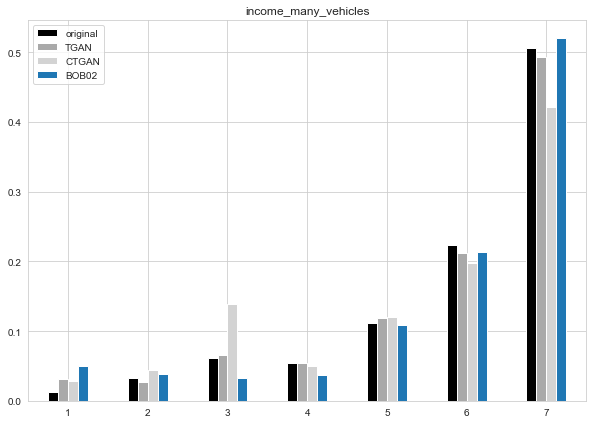

In [26]:
vals = [df[df.hh_vehicles > 2].hh_income for df in dfs]
probs = [v.value_counts(normalize=True) for v in vals]

dct = {}
for l in labels:
    dct[l] = []

idx = np.sort(probs[0].index)

for i in idx:       
    for j, l in enumerate(labels):
        try:
            val = probs[j].loc[i]
        except:
            val = 0
        dct[l].append(val)


tmp_df = pd.DataFrame(dct, index=idx)

tmp_df.plot(figsize=(10,7), kind='bar', color=colors[:len(labels)])

plt.legend()
plt.xticks(rotation=0)

plt.title('income_many_vehicles')

#plt.savefig('../figures/tgan-chicago/sub/income_many_vehicles.pdf', bbox_inches='tight')
#plt.savefig('../figures/tgan-chicago/sub/income_many_vehicles.png', bbox_inches='tight')

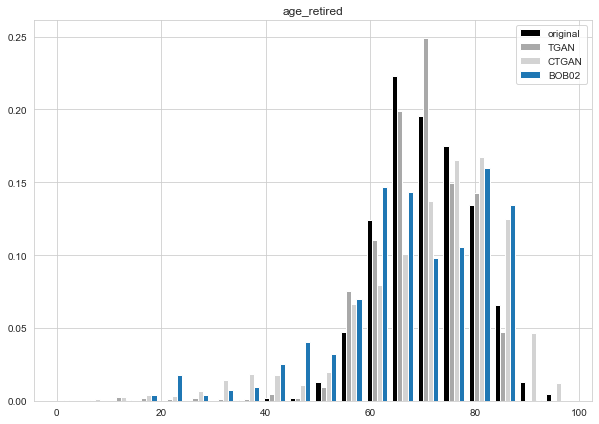

In [27]:
vals = [df[df.work_status == 'Retired'].age for df in dfs]
weights = [np.ones_like(v)/len(v) for v in vals]

plt.figure(figsize=(10,7))

bins=np.histogram(np.hstack((vals[0],vals[1])), bins=20)[1] 

plt.hist(vals,
         bins=bins, weights = weights,
         label=labels, color=colors[:len(labels)])

plt.title('age_retired')
plt.legend()

#plt.savefig('../figures/tgan-chicago/sub/age_retired.pdf', bbox_inches='tight')
#plt.savefig('../figures/tgan-chicago/sub/age_retired.png', bbox_inches='tight')

Text(0.5, 1.0, 'age_worker')

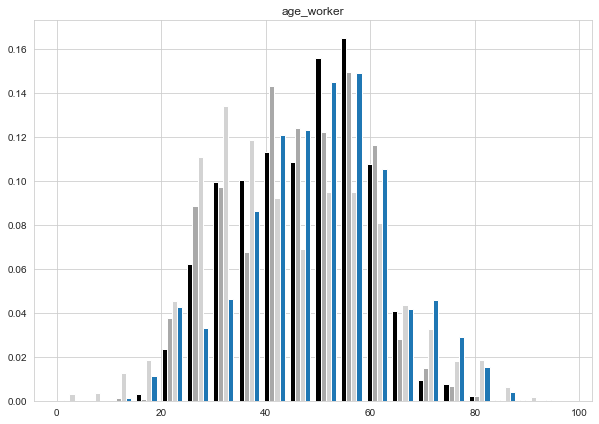

In [28]:
vals = [df[df.work_status == 'FTE'].age for df in dfs]
weights = [np.ones_like(v)/len(v) for v in vals]

plt.figure(figsize=(10,7))

bins=np.histogram(np.hstack((vals[0],vals[1])), bins=20)[1] 

plt.hist(vals,
         bins=bins, weights = weights,
         label=labels, color=colors[:len(labels)])

plt.title('age_worker')

#plt.savefig('../figures/tgan-chicago/sub/age_worker.pdf', bbox_inches='tight')
#plt.savefig('../figures/tgan-chicago/sub/age_worker.png', bbox_inches='tight')

Text(0.5, 1.0, 'age_student')

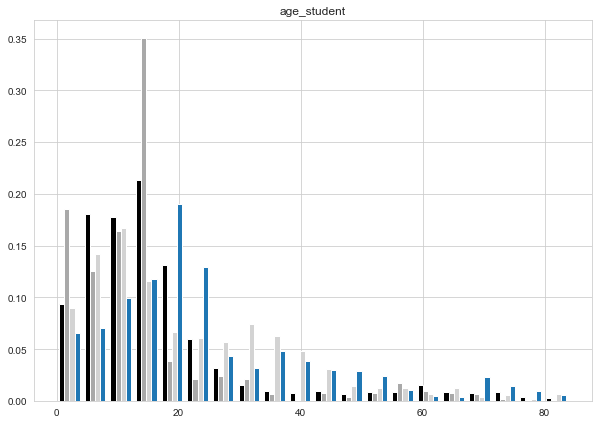

In [29]:
vals = [df[df.work_status == 'Student'].age for df in dfs]
weights = [np.ones_like(v)/len(v) for v in vals]

plt.figure(figsize=(10,7))

bins=np.histogram(np.hstack((vals[0],vals[1])), bins=20)[1] 

plt.hist(vals,
         bins=bins, weights = weights,
         label=labels, color=colors[:len(labels)])

plt.title('age_student')

#plt.savefig('../figures/tgan-chicago/sub/age_student.pdf', bbox_inches='tight')
#plt.savefig('../figures/tgan-chicago/sub/age_student.png', bbox_inches='tight')

Text(0.5, 1.0, 'work_status_work_trip')

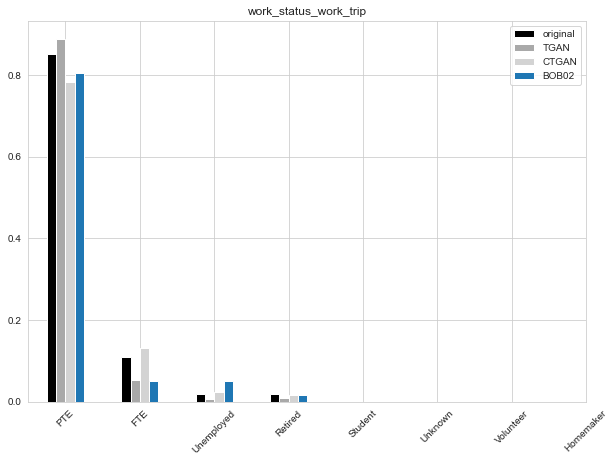

In [30]:
vals = [df[df.trip_purpose == 'HOME_WORK'].work_status for df in dfs]
probs = [v.value_counts(normalize=True) for v in vals]

dct = {}
for l in labels:
    dct[l] = []

idx = np.sort(probs[0].index)

for i in idx:       
    for j, l in enumerate(labels):
        try:
            val = probs[j].loc[i]
        except:
            val = 0
        dct[l].append(val)


tmp_df = pd.DataFrame(dct, index=idx)

tmp_df.plot(figsize=(10,7), kind='bar', color=colors[:len(labels)])

plt.legend()

plt.xticks(list(range(len(work_status))), list(work_status.values()), rotation=45)

plt.title('work_status_work_trip')

#plt.savefig('../figures/tgan-chicago/sub/work_status_work_trip.pdf', bbox_inches='tight')
#plt.savefig('../figures/tgan-chicago/sub/work_status_work_trip.png', bbox_inches='tight')

Text(0.5, 1.0, 'gender_homemaker')

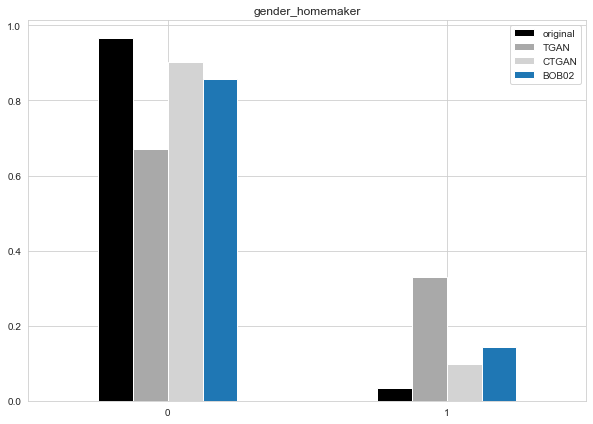

In [31]:
vals = [df[df.work_status == 'Homemaker'].gender for df in dfs]
probs = [v.value_counts(normalize=True) for v in vals]

dct = {}
for l in labels:
    dct[l] = []

idx = np.sort(probs[0].index)

for i in idx:       
    for j, l in enumerate(labels):
        try:
            val = probs[j].loc[i]
        except:
            val = 0
        dct[l].append(val)


tmp_df = pd.DataFrame(dct, index=idx)

tmp_df.plot(figsize=(10,7), kind='bar', color=colors[:len(labels)])

plt.legend()

plt.xticks(rotation=0)

plt.title('gender_homemaker')

#plt.savefig('../figures/tgan-chicago/sub/gender_homemaker.pdf', bbox_inches='tight')
#plt.savefig('../figures/tgan-chicago/sub/gender_homemaker.png', bbox_inches='tight')